### Risk-Aversion (A)
- the level of risk the investor is willing to take on.
- A is the level of risk-aversion.
- if A == 0: Risk-Neutral. This means the investor is indifferent and receives the risk-premium
- if A < 0: Risk-Loving. This is your gambler. Any chance of positive expected returns is a green light.
- if A > 0: Risk-Adverse. Most People are risk-adverse.

### Utility
- most people have preferences, these preferences have trade-offs. 
- Utility is that warm fuzzy glow you get when consuming something you like (or dislike and want less of)

- The Equation for Utility with for expected returns and risk-aversion
* 𝑈=𝐸(𝑟)−1/2 𝐴𝜎^2


In [1]:
import numpy as np
from pypfopt import expected_returns
from scripts.returns import Returns
from tools.config import load_config
import pandas as pd
from typing import List


class Utility:
    """
    A class to Maximize Utility of the Expected returns:
    u = E(r) - A * 1/2 * var(r)
    """
    def __init__(self,config: dict, returns: Returns | None = None):
        """
        Initialize Utility object.
        Args:
            config (dict): config.py file.
            data_ingestion(DataIngestion): class used to fetch data from yfinance API.
        
        Returns:
            u (pd.Series): utility of the investor.
        """
        self.config = config or load_config()
        self.returns = returns or Returns(config)
        
    def run(self) -> pd.Series:
        """
        run utility module.
        
        Returns:
            u (List[float]): the utility of the investor based on A, expected returns, and risk(var).
        """
        # closing prices
        returns = self.returns.get_stock_returns()
        
        # expected returns from pyportfolio library.
        
        er = np.mean(returns)
        
        # variance
        var = np.var(returns)
        
        # A is the investors level of risk aversion. if A > 0: Risk-Adverse, A == 0; Risk-Neutral, A < 0; Risk-Loving
        
        
        
        # set A == 3.0 for risk-adverse investors because most investors are risk-adverse
        A = 3.0
        
        
        # utility function
        u = er - (0.5) * A * var
        

        print(f"investors level of risk aversion: {u}")
        return u
    
if __name__ == "__main__":
    util_config = Utility(config=load_config())
    neutral_risk_aversion = util_config.run()
    






        
        
        
        
        
        


investors level of risk aversion: AAPL     0.000482
F        0.000017
GM       0.000123
GOOGL    0.000381
MCD      0.000777
MSFT     0.000559
NVDA    -0.000664
SBUX     0.000378
TSLA    -0.001265
WMT      0.000695
dtype: float64


/home/nickkats1/Portfolio/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


### Maximizing Utility
- Equation:
    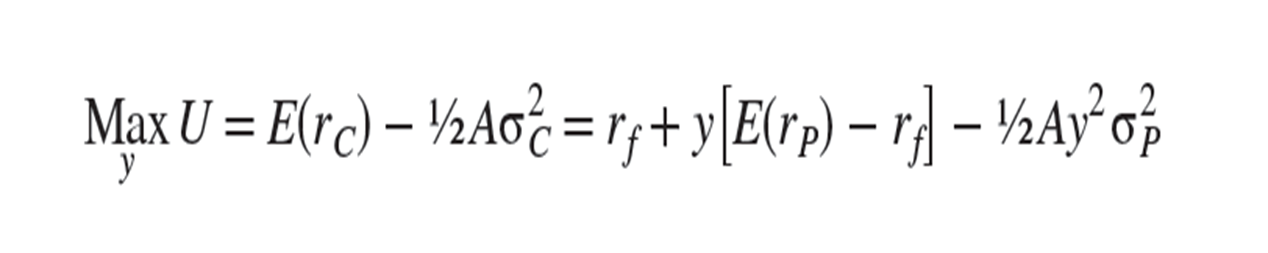

- y*: the optimal portion to allocate to a risky asset
equation:
    𝑦∗=(𝐸(𝑟_𝑃)−𝑟_𝑓)/(𝐴𝜎_𝑃^2 )
    

In [2]:


class MaxUtility:
    """
    a class for maximizing utility.
    Max (u) = rf + y*[E(rp) - rf] - (1/2) * A * y**2 * var(portfolio)
    """
    def __init__(self,config,returns: Returns | None = None):
        self.config = config or load_config()
        self.returns = returns or Returns(self.config)
        
        
    def run(self) -> pd.Series:
        """
        the utility of the investor with optimized utility.
        
        Returns:
            U (pd.Series): list of investors utility level for each asset class.
        """
        stock_returns = self.returns.get_all_returns()
        
        # expected returns
        er = np.mean(stock_returns)
        
        # risk-free-rate
        risk_free_rate = self.config['risk_free_rate']
        
        # variance of returns
        var = np.var(stock_returns)
        
        # set A = 3.0
        A = 3.0
        
        y_star = (er - risk_free_rate) / (A * var)
        
        # maximize U
        
        max_u = risk_free_rate + y_star * (er - risk_free_rate) - (0.5) * A * y_star**2 * var
        print(f"Max Utils: {max_u}")
        
        
        return max_u
        
        

if __name__ == "__main__":
    mu = MaxUtility(config=load_config())
    mu.run()

Max Utils: AAPL     0.014726
ARKK     0.008464
DIA      0.040741
EFA      0.034663
F        0.009886
GM       0.010515
GOOGL    0.013001
IWM      0.019620
MCD      0.031192
MSFT     0.016629
NVDA     0.007827
QQQ      0.019984
SBUX     0.012968
SPY      0.031254
TSLA     0.007062
VOO      0.032016
VTI      0.030100
WMT      0.022832
XLF      0.026430
XLK      0.017658
^GSPC    0.031734
dtype: float64


/home/nickkats1/Portfolio/venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:4266: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
